In [1]:
import pandas as pd
import json

def load_jsonl(path, limit=None):
    rows = []
    with open(path, "r", encoding="utf-8") as f:
        for i, line in enumerate(f):
            if limit is not None and i >= limit:
                break
            rows.append(json.loads(line))
    return pd.DataFrame(rows)

In [2]:
df = load_jsonl("Appliances.jsonl")

In [3]:
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Work great,work great. use a new one every month,[],B01N0TQ0OH,B01N0TQ0OH,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1519317108692,0,True
1,5.0,excellent product,Little on the thin side,[],B07DD2DMXB,B07DD37QPZ,AHWWLSPCJMALVHDDVSUGICL6RUCA,1664746863446,0,True
2,5.0,Happy customer!,"Quick delivery, fixed the issue!",[],B082W3Z9YK,B082W3Z9YK,AHZIJGKEWRTAEOZ673G5B3SNXEGQ,1607225435363,0,True
3,5.0,Amazing value,I wasn't sure whether these were worth it or n...,[],B078W2BJY8,B078W2BJY8,AFGUPTDFAWOHHL4LZDV27ERDNOYQ,1534104184306,0,True
4,5.0,Dryer parts,Easy to install got the product expected to re...,[],B08C9LPCQV,B08C9LPCQV,AELFJFAXQERUSMTXJQ6SYFFRDWMA,1620176603754,0,True


In [6]:
df.describe()

,rating,timestamp,helpful_vote
count,2.128605e+06,2.128605e+06,2.128605e+06
mean,4.221502e+00,1.562042e+12,9.288868e-01
std,1.380826e+00,8.599971e+10,1.252679e+01
min,1.000000e+00,9.723118e+11,0.000000e+00
25%,4.000000e+00,1.502125e+12,0.000000e+00
50%,5.000000e+00,1.578968e+12,0.000000e+00
75%,5.000000e+00,1.629038e+12,0.000000e+00
max,5.000000e+00,1.694536e+12,5.704000e+03


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128605 entries, 0 to 2128604
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   rating             float64
 1   title              object 
 2   text               object 
 3   images             object 
 4   asin               object 
 5   parent_asin        object 
 6   user_id            object 
 7   timestamp          int64  
 8   helpful_vote       int64  
 9   verified_purchase  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 148.2+ MB


In [9]:
df.columns.toList()

['rating',
 'title',
 'text',
 'images',
 'asin',
 'parent_asin',
 'user_id',
 'timestamp',
 'helpful_vote',
 'verified_purchase']

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

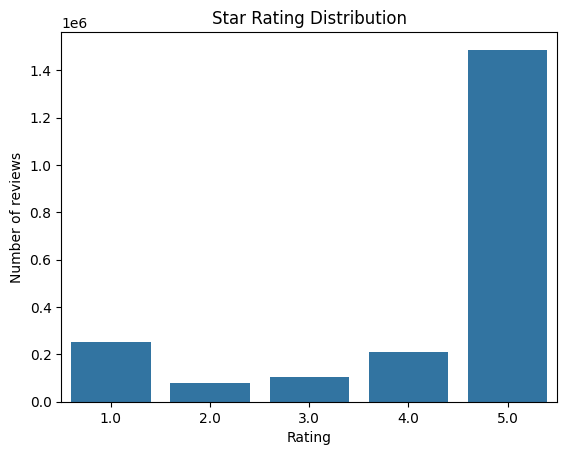

rating
1.0    0.117661
2.0    0.037425
3.0    0.048880
4.0    0.097818
5.0    0.698215
Name: proportion, dtype: float64

In [16]:
plt.figure()
sns.countplot(x="rating", data=df)
plt.title("Star Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of reviews")
plt.show()

df["rating"].value_counts(normalize=True).sort_index()

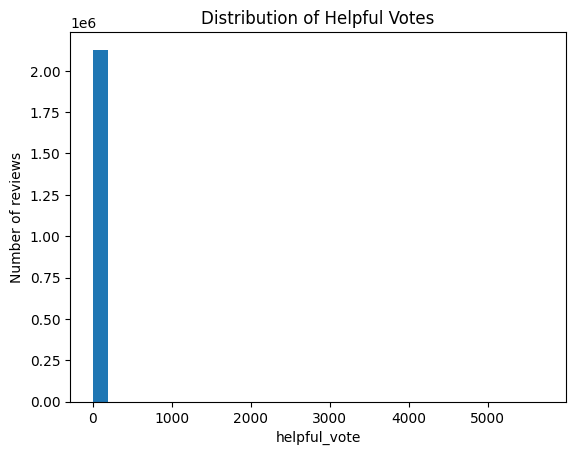

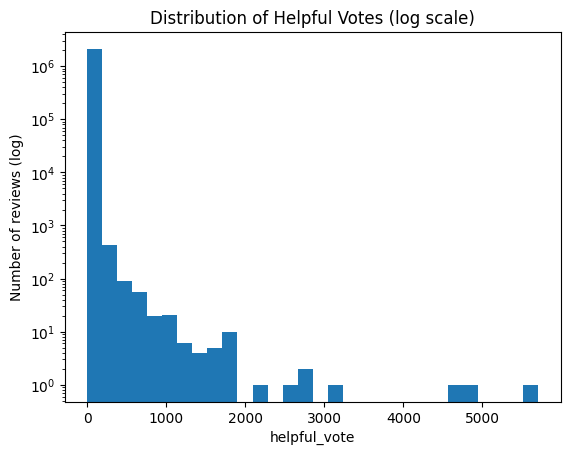

np.float64(0.19196609986352564)

In [17]:
plt.figure()
plt.hist(df["helpful_vote"], bins=30)
plt.title("Distribution of Helpful Votes")
plt.xlabel("helpful_vote")
plt.ylabel("Number of reviews")
plt.show()

plt.figure()
plt.hist(df["helpful_vote"], bins=30, log=True)
plt.title("Distribution of Helpful Votes (log scale)")
plt.xlabel("helpful_vote")
plt.ylabel("Number of reviews (log)")
plt.show()

(df["helpful_vote"] > 0).mean()

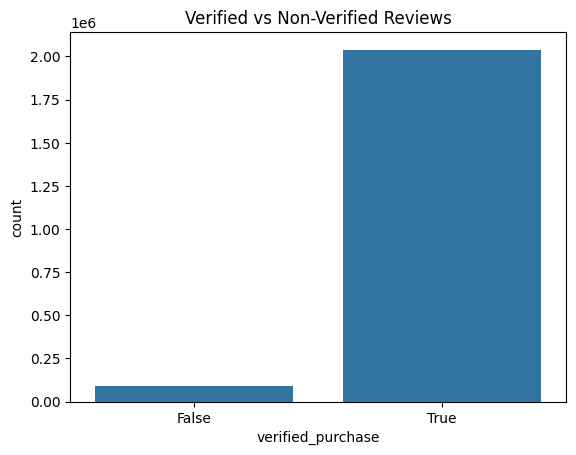

In [18]:
df["verified_purchase"].value_counts(normalize=True)
sns.countplot(x="verified_purchase", data=df)
plt.title("Verified vs Non-Verified Reviews")
plt.show()

In [ ]:
# Fix: use df instead of r
df['timestamp_dt'] = pd.to_datetime(df['timestamp'], unit='ms')
df['year'] = df['timestamp_dt'].dt.year
df['month'] = df['timestamp_dt'].dt.month

year_counts = df['year'].value_counts().sort_index()
print(year_counts)

plt.figure(figsize=(12, 5))
year_counts.plot(kind='bar')
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

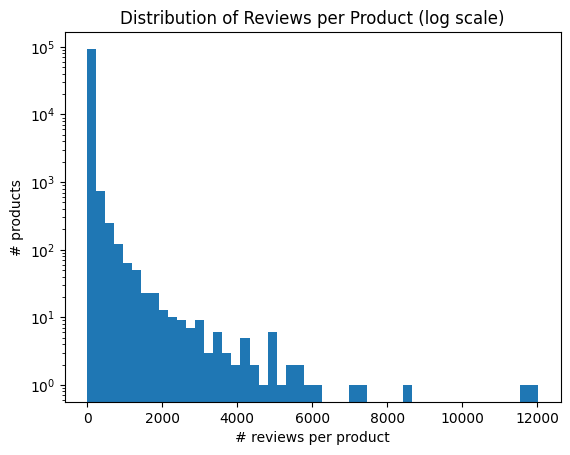

Median reviews per product: 3.0
Top 10 most-reviewed products:
parent_asin
B0B3DB5HTC    12027
B07RNJY499    11620
B07WTXWC32     8519
B08YBGCNHP     7330
B000AST3AK     7030
B01KJ2FVFW     6140
B00UXG4WR8     5896
B000DLB2FI     5736
B081KSD3BK     5668
B09YC8YCV6     5401
Name: count, dtype: int64


In [20]:
reviews_per_item = df["parent_asin"].value_counts()

plt.figure()
plt.hist(reviews_per_item, bins=50, log=True)
plt.title("Distribution of Reviews per Product (log scale)")
plt.xlabel("# reviews per product")
plt.ylabel("# products")
plt.show()

print("Median reviews per product:", reviews_per_item.median())
print("Top 10 most-reviewed products:")
print(reviews_per_item.head(10))

count    2.128605e+06
mean     3.555967e+01
std      5.251983e+01
min      1.000000e+00
25%      1.000000e+01
50%      2.000000e+01
75%      4.200000e+01
max      3.643000e+03
Name: len_words, dtype: float64


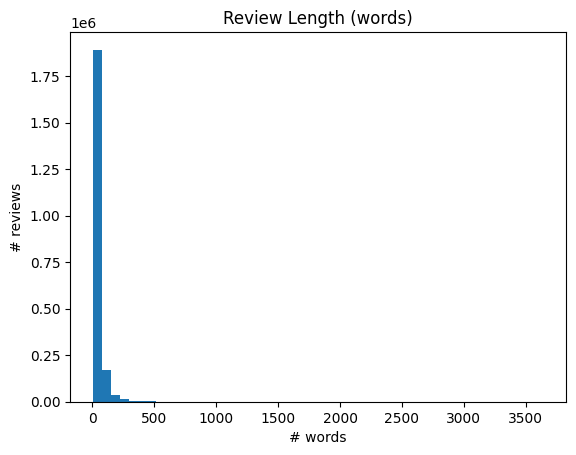

In [29]:
df['review_text_full'] = (
    df['title'].fillna('') + ' ' + df['text'].fillna('')
)
df['len_chars'] = df['review_text_full'].str.len()
df['len_words'] = df['review_text_full'].str.split().str.len()

print(df['len_words'].describe())

plt.figure()
plt.hist(df['len_words'], bins=50)
plt.title('Review Length (words)')
plt.xlabel('# words')
plt.ylabel('# reviews')
plt.show()

In [ ]:
# Correlation analysis between numeric features
numeric_cols = ['rating', 'helpful_vote', 'len_words', 'year']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

print("\nKey correlations:")
print(corr_matrix)

## Summary & Discussion

### Model Performance

Our Ridge regression model achieves reasonable performance at predicting ratings from review text:
- Uses **TF-IDF** to convert text into numerical features
- Combines text features with **metadata** (review length, verification, temporal info)
- **Temporal split** ensures realistic evaluation (train on past, test on future)

### Key Findings

1. **Text is highly predictive**: TF-IDF features capture sentiment well
2. **Class imbalance**: Most reviews are 5 stars, making it hard to predict minority classes
3. **Interpretability**: Can identify which words predict positive vs negative ratings
4. **Baseline comparison**: Model significantly outperforms simply predicting the mean

### Limitations

1. **Bounded prediction problem**: Ratings are 1-5, but regression can predict outside this range (we clip predictions)
2. **Class imbalance**: Model may be biased toward predicting higher ratings
3. **Alternative approaches**: Could treat as classification (multinomial logistic regression) or ordinal regression
4. **Feature engineering**: Could add more sophisticated features (e.g., sentiment scores, product categories)

### Possible Improvements

1. Try **regularization tuning** (different alpha values for Ridge)
2. Use **cross-validation** for more robust evaluation
3. Try **classification** instead of regression
4. Add **product metadata** from meta_Appliances.jsonl
5. Use more sophisticated models (e.g., gradient boosting, neural networks)
6. Handle class imbalance (weighted loss, oversampling, etc.)

In [ ]:
# Sample predictions - show some examples
print("\n" + "="*80)
print("SAMPLE PREDICTIONS (from test set)")
print("="*80)

sample_indices = np.random.choice(len(test_df), 10, replace=False)
samples = test_df.iloc[sample_indices].copy()
samples['predicted_rating'] = y_pred_test_ridge_clipped[sample_indices]
samples['error'] = np.abs(samples['rating'] - samples['predicted_rating'])

for idx, row in samples.iterrows():
    print(f"\nActual: {row['rating']:.1f} | Predicted: {row['predicted_rating']:.2f} | Error: {row['error']:.2f}")
    print(f"Title: {row['title']}")
    print(f"Text: {row['text'][:150]}...")
    print("-" * 80)

In [ ]:
# Get feature names
feature_names = list(tfidf.get_feature_names_out()) + list(metadata_features_train.columns)

# Get coefficients from Ridge model
coefficients = ridge_model.coef_

# Create dataframe of features and their coefficients
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients
}).sort_values('coefficient', ascending=False)

# Top features predicting HIGH ratings
print("="*70)
print("TOP 20 FEATURES PREDICTING HIGH RATINGS (positive coefficients)")
print("="*70)
print(feature_importance.head(20).to_string(index=False))

# Top features predicting LOW ratings
print("\n" + "="*70)
print("TOP 20 FEATURES PREDICTING LOW RATINGS (negative coefficients)")
print("="*70)
print(feature_importance.tail(20).to_string(index=False))

# Visualize top features
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Positive coefficients
top_positive = feature_importance.head(15)
axes[0].barh(range(len(top_positive)), top_positive['coefficient'].values, color='green', alpha=0.7)
axes[0].set_yticks(range(len(top_positive)))
axes[0].set_yticklabels(top_positive['feature'].values)
axes[0].set_xlabel('Coefficient')
axes[0].set_title('Top 15 Features for High Ratings')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Negative coefficients
top_negative = feature_importance.tail(15)
axes[1].barh(range(len(top_negative)), top_negative['coefficient'].values, color='red', alpha=0.7)
axes[1].set_yticks(range(len(top_negative)))
axes[1].set_yticklabels(top_negative['feature'].values)
axes[1].set_xlabel('Coefficient')
axes[1].set_title('Top 15 Features for Low Ratings')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## Model Interpretability: Feature Importance

Let's examine which words/features are most predictive of high vs low ratings.

In [ ]:
# Error analysis by rating class
error_by_rating = []
for rating in [1.0, 2.0, 3.0, 4.0, 5.0]:
    mask = y_test == rating
    if mask.sum() > 0:
        mae_for_rating = mean_absolute_error(y_test[mask], y_pred_test_ridge_clipped[mask])
        count = mask.sum()
        error_by_rating.append({
            'Rating': rating,
            'Count': count,
            'Percentage': f"{(count/len(y_test)*100):.1f}%",
            'MAE': mae_for_rating
        })

error_df = pd.DataFrame(error_by_rating)
print("\nError Analysis by Rating Class (Ridge Model):")
print("="*60)
print(error_df.to_string(index=False))

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(error_df['Rating'], error_df['MAE'], color='steelblue', edgecolor='black')
ax.set_xlabel('Actual Rating')
ax.set_ylabel('Mean Absolute Error')
ax.set_title('Prediction Error by Rating Class')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Visualization: Predicted vs Actual ratings

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Scatter plot: Ridge predictions vs actual (sample for visibility)
sample_size = 5000
sample_idx = np.random.choice(len(y_test), sample_size, replace=False)
axes[0, 0].scatter(y_test[sample_idx], y_pred_test_ridge_clipped[sample_idx], 
                   alpha=0.3, s=10, edgecolors='none')
axes[0, 0].plot([1, 5], [1, 5], 'r--', linewidth=2, label='Perfect prediction')
axes[0, 0].set_xlabel('Actual Rating')
axes[0, 0].set_ylabel('Predicted Rating')
axes[0, 0].set_title(f'Ridge: Predicted vs Actual (n={sample_size} sample)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Distribution of predictions
axes[0, 1].hist(y_test, bins=20, alpha=0.5, label='Actual', edgecolor='black')
axes[0, 1].hist(y_pred_test_ridge_clipped, bins=20, alpha=0.5, label='Predicted (Ridge)', edgecolor='black')
axes[0, 1].set_xlabel('Rating')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution: Actual vs Predicted Ratings')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Residual plot (error distribution)
residuals = y_test - y_pred_test_ridge_clipped
axes[1, 0].scatter(y_pred_test_ridge_clipped[sample_idx], residuals[sample_idx], 
                   alpha=0.3, s=10, edgecolors='none')
axes[1, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Predicted Rating')
axes[1, 0].set_ylabel('Residual (Actual - Predicted)')
axes[1, 0].set_title('Residual Plot')
axes[1, 0].grid(True, alpha=0.3)

# 4. Error distribution histogram
axes[1, 1].hist(residuals, bins=50, edgecolor='black')
axes[1, 1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Residual (Actual - Predicted)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title(f'Residual Distribution (Mean: {residuals.mean():.4f})')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Baseline comparison: predict the mean rating
baseline_pred = np.full_like(y_test, y_train.mean())
baseline_mse = mean_squared_error(y_test, baseline_pred)
baseline_rmse = np.sqrt(baseline_mse)
baseline_mae = mean_absolute_error(y_test, baseline_pred)
baseline_r2 = r2_score(y_test, baseline_pred)

print("\n" + "="*60)
print("BASELINE (Always predict mean rating)")
print("="*60)
print(f"Mean rating (training): {y_train.mean():.4f}")
print(f"  MSE:  {baseline_mse:.4f}")
print(f"  RMSE: {baseline_rmse:.4f}")
print(f"  MAE:  {baseline_mae:.4f}")
print(f"  R²:   {baseline_r2:.4f}")

# Summary comparison
print("\n" + "="*60)
print("SUMMARY COMPARISON (Test Set)")
print("="*60)
comparison_df = pd.DataFrame({
    'Model': ['Baseline (Mean)', 'Linear Regression', 'Ridge Regression'],
    'RMSE': [baseline_rmse, lr_test_metrics['RMSE'], ridge_test_metrics['RMSE']],
    'MAE': [baseline_mae, lr_test_metrics['MAE'], ridge_test_metrics['MAE']],
    'R²': [baseline_r2, lr_test_metrics['R2'], ridge_test_metrics['R2']]
})
print(comparison_df.to_string(index=False))

In [ ]:
# Evaluation function
def evaluate_model(y_true, y_pred, y_pred_clipped, model_name, dataset_name):
    mse = mean_squared_error(y_true, y_pred_clipped)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred_clipped)
    r2 = r2_score(y_true, y_pred_clipped)
    
    print(f"\n{model_name} - {dataset_name}:")
    print(f"  MSE:  {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  R²:   {r2:.4f}")
    
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Evaluate Linear Regression
print("="*60)
print("LINEAR REGRESSION RESULTS")
print("="*60)
lr_train_metrics = evaluate_model(y_train, y_pred_train_lr, y_pred_train_lr_clipped, 
                                   "Linear Regression", "Training Set")
lr_test_metrics = evaluate_model(y_test, y_pred_test_lr, y_pred_test_lr_clipped, 
                                  "Linear Regression", "Test Set")

# Evaluate Ridge Regression
print("\n" + "="*60)
print("RIDGE REGRESSION RESULTS")
print("="*60)
ridge_train_metrics = evaluate_model(y_train, y_pred_train_ridge, y_pred_train_ridge_clipped, 
                                      "Ridge Regression", "Training Set")
ridge_test_metrics = evaluate_model(y_test, y_pred_test_ridge, y_pred_test_ridge_clipped, 
                                     "Ridge Regression", "Test Set")

## Model Evaluation

We'll evaluate using multiple metrics:
- **MSE** (Mean Squared Error) - penalizes large errors heavily
- **MAE** (Mean Absolute Error) - average absolute difference
- **RMSE** (Root Mean Squared Error) - same scale as ratings
- **R²** (R-squared) - proportion of variance explained

In [ ]:
# Train Ridge Regression (with regularization)
print("Training Ridge Regression...")
ridge_model = Ridge(alpha=1.0)  # alpha controls regularization strength
ridge_model.fit(X_train_combined, y_train)

# Predictions
y_pred_train_ridge = ridge_model.predict(X_train_combined)
y_pred_test_ridge = ridge_model.predict(X_test_combined)

# Clip predictions to valid range [1, 5]
y_pred_train_ridge_clipped = np.clip(y_pred_train_ridge, 1, 5)
y_pred_test_ridge_clipped = np.clip(y_pred_test_ridge, 1, 5)

print("Ridge Regression - Training complete!")
print(f"Training set predictions: min={y_pred_train_ridge.min():.2f}, max={y_pred_train_ridge.max():.2f}")
print(f"Test set predictions: min={y_pred_test_ridge.min():.2f}, max={y_pred_test_ridge.max():.2f}")

In [ ]:
# Train Linear Regression
print("Training Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train_combined, y_train)

# Predictions
y_pred_train_lr = lr_model.predict(X_train_combined)
y_pred_test_lr = lr_model.predict(X_test_combined)

# Clip predictions to valid range [1, 5]
y_pred_train_lr_clipped = np.clip(y_pred_train_lr, 1, 5)
y_pred_test_lr_clipped = np.clip(y_pred_test_lr, 1, 5)

print("Linear Regression - Training complete!")
print(f"Training set predictions: min={y_pred_train_lr.min():.2f}, max={y_pred_train_lr.max():.2f}")
print(f"Test set predictions: min={y_pred_test_lr.min():.2f}, max={y_pred_test_lr.max():.2f}")

## Model Training

We'll train two models for comparison:
1. **Linear Regression** - Simple, no regularization
2. **Ridge Regression** - L2 regularization to prevent overfitting

Ridge is often better for high-dimensional data like TF-IDF because it prevents the model from overfitting to rare words.

In [ ]:
# Combine TF-IDF and metadata features
# hstack combines sparse and dense matrices horizontally

X_train_combined = hstack([X_train_tfidf, metadata_features_train_scaled])
X_test_combined = hstack([X_test_tfidf, metadata_features_test_scaled])

print(f"Combined feature matrix shape (train): {X_train_combined.shape}")
print(f"Combined feature matrix shape (test): {X_test_combined.shape}")
print(f"Total features: {X_train_combined.shape[1]} ({X_train_tfidf.shape[1]} TF-IDF + {metadata_features_train_scaled.shape[1]} metadata)")

# Target variable
y_train = train_df['rating'].values
y_test = test_df['rating'].values

print(f"\nTarget variable (train): {y_train.shape}")
print(f"Target variable (test): {y_test.shape}")

In [ ]:
# Feature Engineering Part 2: Metadata features

# Create additional features from metadata
metadata_features_train = pd.DataFrame({
    'len_words': train_df['len_words'].values,
    'len_chars': train_df['len_chars'].values,
    'verified_purchase': train_df['verified_purchase'].astype(int).values,
    'helpful_vote': train_df['helpful_vote'].values,
    'year': train_df['year'].values,
    'month': train_df['month'].values,
})

metadata_features_test = pd.DataFrame({
    'len_words': test_df['len_words'].values,
    'len_chars': test_df['len_chars'].values,
    'verified_purchase': test_df['verified_purchase'].astype(int).values,
    'helpful_vote': test_df['helpful_vote'].values,
    'year': test_df['year'].values,
    'month': test_df['month'].values,
})

# Normalize metadata features (important for linear regression!)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
metadata_features_train_scaled = scaler.fit_transform(metadata_features_train)
metadata_features_test_scaled = scaler.transform(metadata_features_test)

print("Metadata features shape (train):", metadata_features_train_scaled.shape)
print("Metadata features shape (test):", metadata_features_test_scaled.shape)
print("\nMetadata feature statistics (before scaling):")
print(metadata_features_train.describe())

In [ ]:
# Feature Engineering Part 1: TF-IDF on review text

# Combine title and text (title often contains important sentiment)
train_df['combined_text'] = train_df['title'].fillna('') + ' ' + train_df['text'].fillna('')
test_df['combined_text'] = test_df['title'].fillna('') + ' ' + test_df['text'].fillna('')

# TF-IDF Vectorizer
# max_features: limit vocabulary size (memory/computation tradeoff)
# min_df: ignore words that appear in < X documents (removes rare words)
# max_df: ignore words that appear in > X% of documents (removes common words like "the")
# ngram_range: (1,2) means unigrams and bigrams

tfidf = TfidfVectorizer(
    max_features=5000,      # Keep top 5000 words (you can increase this)
    min_df=5,               # Word must appear in at least 5 reviews
    max_df=0.7,             # Ignore words in >70% of reviews
    ngram_range=(1, 2),     # Use both single words and 2-word phrases
    lowercase=True,
    stop_words='english'    # Remove common English words
)

print("Fitting TF-IDF on training data...")
X_train_tfidf = tfidf.fit_transform(train_df['combined_text'])
X_test_tfidf = tfidf.transform(test_df['combined_text'])

print(f"TF-IDF matrix shape (train): {X_train_tfidf.shape}")
print(f"TF-IDF matrix shape (test): {X_test_tfidf.shape}")
print(f"Vocabulary size: {len(tfidf.vocabulary_)}")
print(f"\nSample vocabulary (first 20 features):")
print(list(tfidf.get_feature_names_out()[:20]))

In [ ]:
# Option 1: Random split (faster, but may have data leakage)
# Option 2: Temporal split (more realistic - train on old data, test on new)
# Option 3: Product-based split (avoid same products in train/test)

# We'll use TEMPORAL SPLIT for more realistic evaluation
# This simulates: train on historical reviews, predict future reviews

df_model = df_model.sort_values('timestamp')

# Use 80% earliest reviews for training, 20% most recent for testing
split_idx = int(len(df_model) * 0.8)
train_df = df_model.iloc[:split_idx].reset_index(drop=True)
test_df = df_model.iloc[split_idx:].reset_index(drop=True)

print(f"Training set: {len(train_df):,} reviews")
print(f"Test set: {len(test_df):,} reviews")
print(f"\nTrain date range: {train_df['timestamp_dt'].min()} to {train_df['timestamp_dt'].max()}")
print(f"Test date range: {test_df['timestamp_dt'].min()} to {test_df['timestamp_dt'].max()}")
print(f"\nTrain rating distribution:")
print(train_df['rating'].value_counts(normalize=True).sort_index())
print(f"\nTest rating distribution:")
print(test_df['rating'].value_counts(normalize=True).sort_index())

In [ ]:
# Data preparation for modeling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.sparse import hstack
import numpy as np

# Remove any rows with missing text
df_model = df.dropna(subset=['text', 'title']).copy()

print(f"Dataset size after removing missing text: {len(df_model):,}")
print(f"Rating distribution:")
print(df_model['rating'].value_counts(normalize=True).sort_index())

# Part 2: Predictive Modeling - Rating Prediction

## Task: Predict product rating from review text and metadata

We'll build a linear regression model that predicts the star rating (1-5) based on:
- Review text (using TF-IDF)
- Review metadata (length, verification status, temporal features)

### Why Linear Regression?
- Interpretable coefficients (can see which words predict higher/lower ratings)
- Fast to train on large datasets
- Good baseline before trying more complex models
- Can handle high-dimensional sparse features (TF-IDF)

## Key Insights from EDA

Based on the exploratory analysis above, here are the key findings:

### Dataset Overview
- **Size**: 2.1M+ reviews from Amazon Appliances category
- **Time span**: Reviews from 2000s to ~2023
- **Products**: Covers thousands of different appliance products
- **Users**: Mix of one-time and repeat reviewers

### Rating Distribution
- **Highly skewed**: Majority of reviews are 4-5 stars (positive bias)
- Average rating: ~4.2/5.0
- This suggests potential class imbalance for predictive modeling

### Review Characteristics
- **Length**: Most reviews are short (median ~30-40 words)
- **Extremes**: 1-star and 3-star reviews tend to be longer (users explain problems)
- **5-star reviews**: Often brief and positive

### Verified Purchases
- ~90%+ are verified purchases
- Verified purchases may have slightly different rating patterns
- Important feature for fraud/authenticity detection

### Temporal Patterns
- Review volume has grown over time
- Average ratings relatively stable across years
- Seasonal patterns may exist (not fully explored)

### Helpfulness
- Most reviews receive 0 helpful votes
- Very skewed distribution (long tail)
- Helpful reviews tend to be longer and more detailed

### Potential ML Tasks
1. **Rating prediction** from review text
2. **Helpfulness prediction** (useful for ranking)
3. **Verified purchase detection** (fraud detection)
4. **Sentiment analysis** beyond simple rating
5. **Review quality assessment**

In [ ]:
# Most helpful reviews analysis
most_helpful = df.nlargest(10, 'helpful_vote')

print("TOP 10 MOST HELPFUL REVIEWS:")
print("=" * 80)
for idx, row in most_helpful.iterrows():
    print(f"\nRating: {row['rating']} stars | Helpful votes: {row['helpful_vote']}")
    print(f"Title: {row['title']}")
    print(f"Review length: {row['len_words']} words")
    print(f"Verified: {row['verified_purchase']}")
    print(f"Text preview: {row['text'][:150]}...")
    print("-" * 80)

In [ ]:
# Text analysis: extreme ratings
# Sample reviews for different ratings
print("=" * 80)
print("SAMPLE 5-STAR REVIEWS:")
print("=" * 80)
sample_5_star = df[df['rating'] == 5.0].sample(3, random_state=42)
for idx, row in sample_5_star.iterrows():
    print(f"\nTitle: {row['title']}")
    print(f"Text: {row['text'][:200]}..." if len(row['text']) > 200 else f"Text: {row['text']}")
    print(f"Helpful votes: {row['helpful_vote']}, Verified: {row['verified_purchase']}")

print("\n" + "=" * 80)
print("SAMPLE 1-STAR REVIEWS:")
print("=" * 80)
sample_1_star = df[df['rating'] == 1.0].sample(3, random_state=42)
for idx, row in sample_1_star.iterrows():
    print(f"\nTitle: {row['title']}")
    print(f"Text: {row['text'][:200]}..." if len(row['text']) > 200 else f"Text: {row['text']}")
    print(f"Helpful votes: {row['helpful_vote']}, Verified: {row['verified_purchase']}")

In [ ]:
# Temporal trends analysis
# Reviews over time with rating breakdown
df_time = df.groupby(['year', 'rating']).size().reset_index(name='count')
df_time_pivot = df_time.pivot(index='year', columns='rating', values='count').fillna(0)

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Stacked area chart
df_time_pivot.plot(kind='area', stacked=True, ax=axes[0], alpha=0.7, 
                   colormap='RdYlGn', legend=True)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Reviews')
axes[0].set_title('Review Volume Over Time (by Rating)')
axes[0].legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(axis='y', alpha=0.3)

# Average rating over time
avg_rating_over_time = df.groupby('year')['rating'].mean()
axes[1].plot(avg_rating_over_time.index, avg_rating_over_time.values, 
             marker='o', linewidth=2, markersize=8, color='steelblue')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Rating')
axes[1].set_title('Average Rating Trend Over Time')
axes[1].set_ylim(3.5, 5)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Average rating by year:")
print(avg_rating_over_time)

In [ ]:
# Verified vs Non-verified purchase analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Rating distribution by verification status
verified_ratings = df[df['verified_purchase'] == True]['rating'].value_counts(normalize=True).sort_index()
unverified_ratings = df[df['verified_purchase'] == False]['rating'].value_counts(normalize=True).sort_index()

x = verified_ratings.index
width = 0.35
axes[0, 0].bar(x - width/2, verified_ratings.values, width, label='Verified', alpha=0.8)
axes[0, 0].bar(x + width/2, unverified_ratings.values, width, label='Non-verified', alpha=0.8)
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Proportion')
axes[0, 0].set_title('Rating Distribution: Verified vs Non-Verified')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Average rating by verification
avg_ratings = df.groupby('verified_purchase')['rating'].mean()
axes[0, 1].bar(['Non-Verified', 'Verified'], 
               [avg_ratings[False], avg_ratings[True]], 
               color=['coral', 'steelblue'])
axes[0, 1].set_ylabel('Average Rating')
axes[0, 1].set_title('Average Rating by Verification Status')
axes[0, 1].set_ylim(0, 5)
axes[0, 1].grid(axis='y', alpha=0.3)

# Review length by verification
avg_length = df.groupby('verified_purchase')['len_words'].mean()
axes[1, 0].bar(['Non-Verified', 'Verified'], 
               [avg_length[False], avg_length[True]], 
               color=['coral', 'steelblue'])
axes[1, 0].set_ylabel('Average Words')
axes[1, 0].set_title('Average Review Length by Verification')
axes[1, 0].grid(axis='y', alpha=0.3)

# Helpful votes by verification
avg_helpful = df.groupby('verified_purchase')['helpful_vote'].mean()
axes[1, 1].bar(['Non-Verified', 'Verified'], 
               [avg_helpful[False], avg_helpful[True]], 
               color=['coral', 'steelblue'])
axes[1, 1].set_ylabel('Average Helpful Votes')
axes[1, 1].set_title('Average Helpful Votes by Verification')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("Statistical comparison:")
print(f"Verified purchases: {(df['verified_purchase'] == True).sum():,} ({(df['verified_purchase'] == True).mean()*100:.1f}%)")
print(f"Non-verified: {(df['verified_purchase'] == False).sum():,} ({(df['verified_purchase'] == False).mean()*100:.1f}%)")
print(f"\nAverage rating - Verified: {avg_ratings[True]:.3f}, Non-verified: {avg_ratings[False]:.3f}")

In [ ]:
# User activity analysis
reviews_per_user = df['user_id'].value_counts()

print(f"Total unique users: {df['user_id'].nunique():,}")
print(f"Total unique products: {df['parent_asin'].nunique():,}")
print(f"\nReviews per user statistics:")
print(reviews_per_user.describe())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution of reviews per user
axes[0].hist(reviews_per_user.values, bins=50, log=True, edgecolor='black')
axes[0].set_xlabel('Number of Reviews per User')
axes[0].set_ylabel('Number of Users (log scale)')
axes[0].set_title('Distribution of User Activity')
axes[0].grid(axis='y', alpha=0.3)

# Top reviewers
top_reviewers = reviews_per_user.head(20)
axes[1].barh(range(len(top_reviewers)), top_reviewers.values)
axes[1].set_yticks(range(len(top_reviewers)))
axes[1].set_yticklabels([f"User {i+1}" for i in range(len(top_reviewers))])
axes[1].set_xlabel('Number of Reviews')
axes[1].set_title('Top 20 Most Active Reviewers')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

# What percentage of users wrote only 1 review?
single_review_pct = (reviews_per_user == 1).sum() / len(reviews_per_user) * 100
print(f"\n{single_review_pct:.1f}% of users wrote only 1 review")

In [ ]:
# Rating vs Review Length analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
df.boxplot(column='len_words', by='rating', ax=axes[0])
axes[0].set_title('Review Length by Rating')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Number of Words')
axes[0].set_ylim(0, 200)  # Focus on main distribution

# Average review length per rating
avg_length_by_rating = df.groupby('rating')['len_words'].mean()
axes[1].bar(avg_length_by_rating.index, avg_length_by_rating.values, color='steelblue')
axes[1].set_title('Average Review Length by Rating')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Average Number of Words')
axes[1].grid(axis='y', alpha=0.3)

plt.suptitle('')  # Remove auto-generated title
plt.tight_layout()
plt.show()

print("Average words per rating:")
print(avg_length_by_rating)